# **STUDENT GRADE ANALYSIS & PREDICTION**

The data includes academic and personal characteristics of the students as well as final grades. The task is to predict the final grade from the student information. Using Machine Learning Algorithm.

**Creator**: Anandan Raju

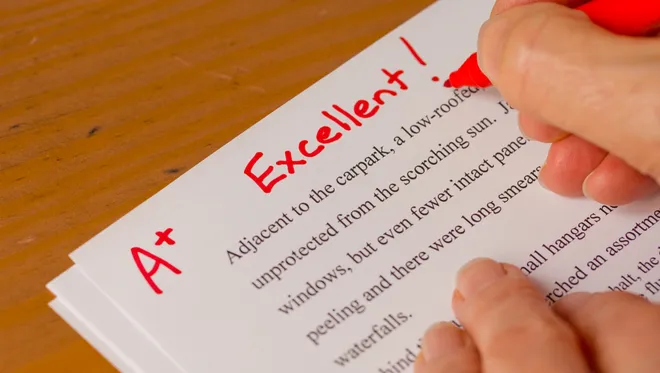

**Synopsis**

1. Import Libraries


2. Installations


3. Data on Plot Visualisation


4. EDA - Exploratory Data Analysis


        1. Does age affect final total grade?
        2. Do urban students perform better than rural students?
        3. Failure Attribute
        4. Family Education Attribute (Fedu+Medu)
        5. Wish to go for Higher Education Attribute
        6. Going Out with Friends Attribute
        7. Romantic relationship Attribute
        8. Reason Attribute
        
5. Failure Attribute


6. Encoding categorical variables using LabelEncoder()

**1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
stdg=pd.read_csv('StudentGrade.csv')

In [3]:
print(stdg.info())
stdg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   Gender      395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,Gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gtotal
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,9


In [4]:
stdg.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gtotal
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.660759
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.719390
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.000000


In [5]:
stdg_corr=stdg.corr()
stdg_corr

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gtotal
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579,-0.131932
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147,0.219673
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457,0.172374
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142,-0.122247
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820,0.132332
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415,-0.369085
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363,0.019434
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307,0.003791
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791,-0.155943
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660,-0.071663


In [6]:
all=stdg.columns
all

Index(['school', 'Gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Gtotal'],
      dtype='object')

**2. Installations**

In [7]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


**3. Data on Plot Visualisation**

In [8]:
import cufflinks as cf
cf.go_offline()
stdg.iplot()

In [9]:
stdg.iplot(kind="bar",barmode="stack")

In [10]:
stdg.iplot(y=[ 'Gender', 'age', 'address', 'absences', 'G3', 'Gtotal'],
               width=1.0,
               subplots=True,sortbars=True, title="Students Dependency Factor on Grade")

In [11]:
stdg['Gtotal'].iplot(kind='hist',bins=90,color='blue')

In [12]:
stdg.iplot(kind='bar',subplots=True,sortbars=True,keys=['age','Gtotal'],size=12,color='Orange',opacity=1)

In [13]:
stdg.iplot(kind='box',subplots=True,sortbars=True,keys=[ 'Gender', 'age','G1', 'G2', 'G3', 'Gtotal'],
           yTitle='Values',title="Students Dependency Factor on Grade in Boxplot")

In [14]:
stdg.iplot(subplots=True,fill=True,y=[ 'Gender', 'age','G3', 'Gtotal'],title="Majority Students Dependency Factor")

In [15]:
stdg.iplot(kind='box',sortbars=True,xTitle='Values of the Header',yTitle='Column Title')

In [16]:
stdg.iplot(kind="scatter3d", x="Gtotal", y="Gender", z="age",
              size=25,
              colors=["green", "yellow", "orange"],
              xTitle="Grade3", yTitle="Gender", zTitle="Student_Age(cM)",
              title="Grade_Total Vs Gender Vs Student_Age Scatter3D Chart")

In [17]:
stdg.iplot(kind="bubble", x="Gtotal", y="Gender",
              size='age',colors=['red'],
              xTitle="Grade_Total", yTitle="Gender", title="Grade_Total Vs Gender Bubble Chart")

In [18]:
stdg.iplot(kind='scatter',x='age',y='Gtotal',mode='markers',size=6)

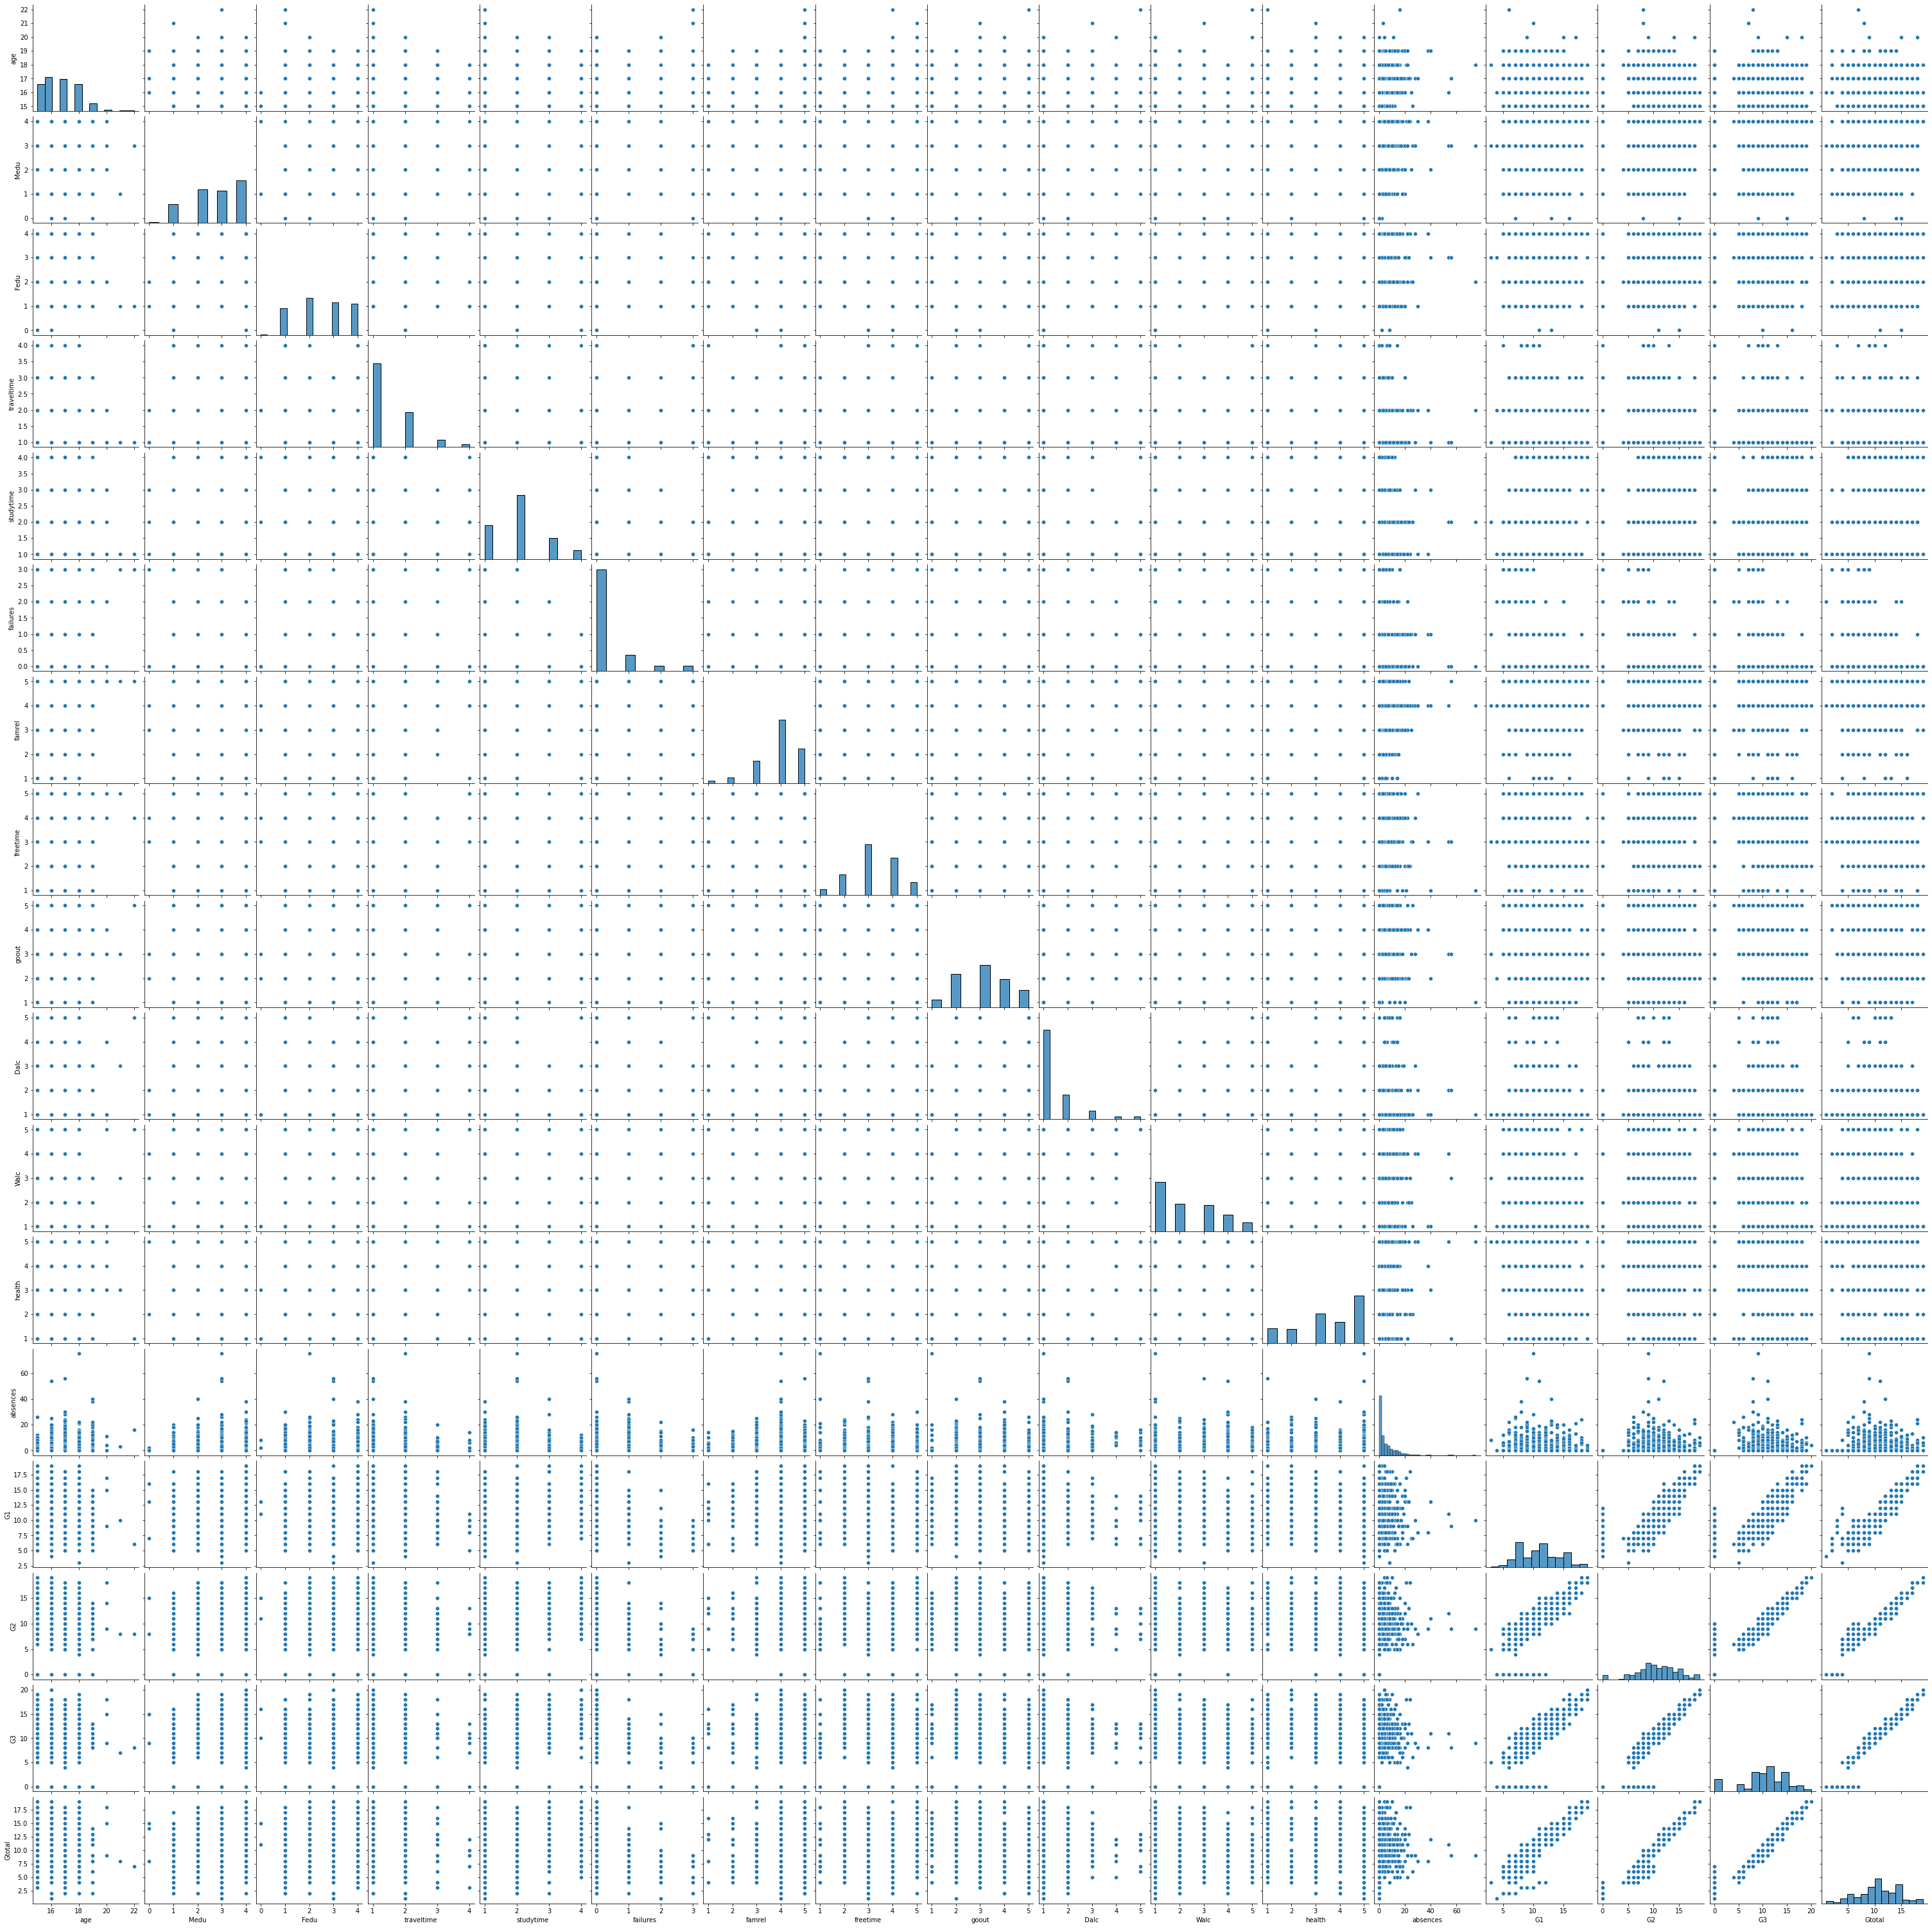

In [19]:
sns.pairplot(stdg)

<AxesSubplot:>

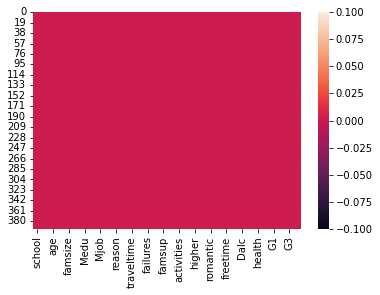

In [20]:
sns.heatmap(stdg.isnull())

In [21]:
stdg_corr.iplot(kind='heatmap',colorscale='reds',dimensions=(500,500))

1. Student's Gender Classification

In [22]:
m_s=len(stdg[stdg['Gender']=='M'])
print('Number of Male Students:',m_s)
f_s=len(stdg[stdg['Gender']=='F'])
print('Number of Female Students:',f_s)

Number of Male Students: 187
Number of Female Students: 208


<AxesSubplot:xlabel='Gender', ylabel='count'>

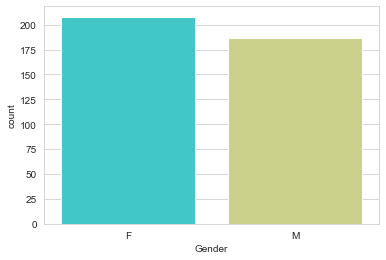

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=stdg,palette='rainbow')

2. Age Of Students

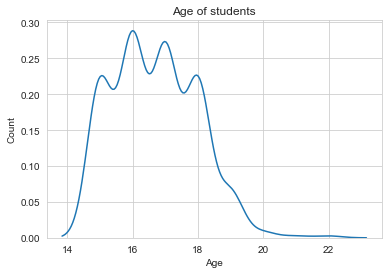

In [24]:
s=sns.kdeplot(stdg['age'])
s.axes.set_title('Age of students')
s.set_xlabel('Age')
s.set_ylabel('Count')
plt.show()

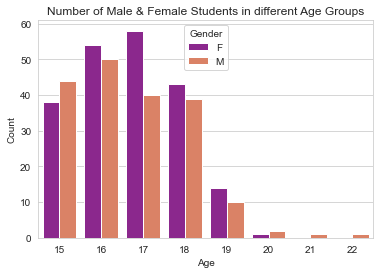

In [25]:
s1=sns.countplot(x='age',hue='Gender',data=stdg,palette='plasma')
s1.axes.set_title('Number of Male & Female Students in different Age Groups')
s1.set_xlabel('Age')
s1.set_ylabel('Count')
sns.set(rc={'figure.figsize':(20,3)})
plt.show()

Student from Urban and Rural Areas

In [26]:
print('Number of Urban Students:',len(stdg[stdg['address']=='U']))
print('Number of Rural Students:',len(stdg[stdg['address']=='R']))

Number of Urban Students: 307
Number of Rural Students: 88


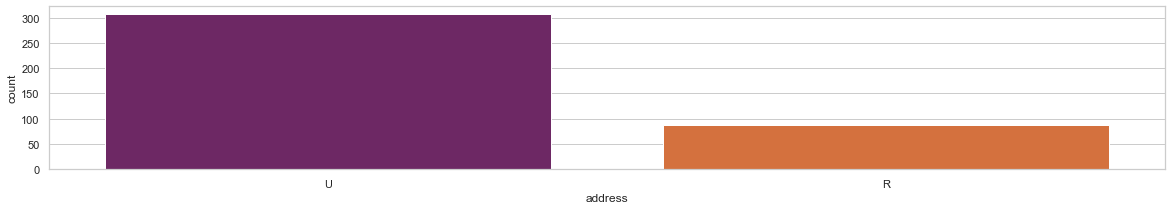

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='address',data=stdg,palette='inferno')
sns.set(rc={'figure.figsize':(5,4)})

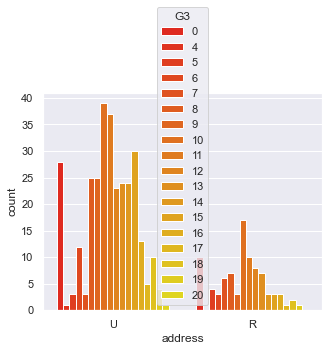

In [28]:
sns.countplot(x='address',hue='G3',data=stdg,palette='autumn')
sns.set(rc={'figure.figsize':(10,3)})

**4. EDA - Exploratory Data Analysis**

1. Does age affect final total grade?

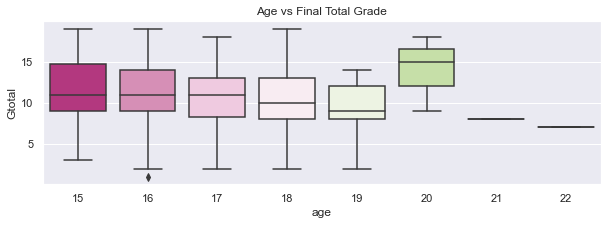

In [29]:
s=sns.boxplot(x='age',y='Gtotal',data=stdg,palette='PiYG')
s.axes.set_title('Age vs Final Total Grade')
sns.set(rc={'figure.figsize':(20,3)})

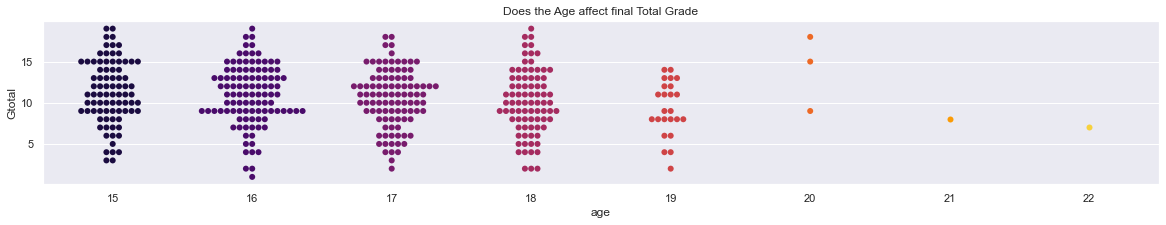

In [30]:
s=sns.swarmplot(x='age',y='Gtotal',data=stdg,palette='inferno',size=6)
s.axes.set_title('Does the Age affect final Total Grade')
sns.set(rc={'figure.figsize':(12,6)})

2. Do urban students perform better than rural students?

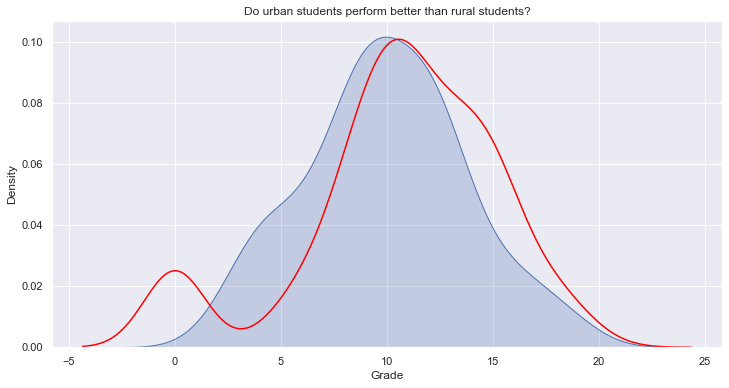

In [31]:
sns.kdeplot(stdg.loc[stdg['address']=='U','G3'],label='Urban',color='red')
sns.kdeplot(stdg.loc[stdg['address']=='R','Gtotal'],label='Rural',shade=True)
plt.title('Do urban students perform better than rural students?')
plt.xlabel('Grade')
plt.ylabel('Density')
sns.set(rc={'figure.figsize':(8,5)})
plt.show()

3. Failure Attribute

D:\Software\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

33.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



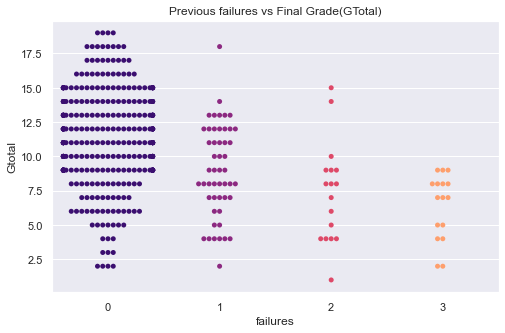

In [32]:
s=sns.swarmplot(x=stdg['failures'],y=stdg['Gtotal'],palette='magma')
s.axes.set_title('Previous failures vs Final Grade(GTotal)')
sns.set(rc={'figure.figsize':(15,3)})

4. Family Education Attribute (Fedu+Medu)

Text(0.5, 1.0, 'Family Education Attribute (Fedu+Medu)')

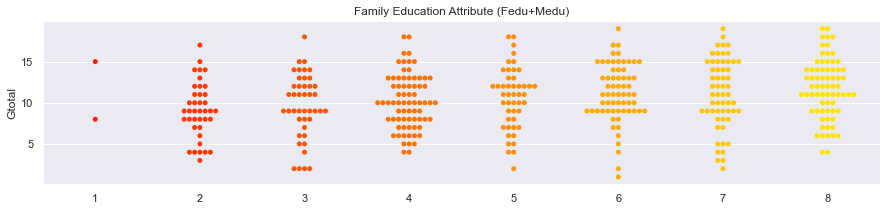

In [33]:
f_edu=stdg['Fedu']+stdg['Medu']
b=sns.swarmplot(x=f_edu,y=stdg['Gtotal'],palette='autumn')
b.axes.set_title('Family Education Attribute (Fedu+Medu)')

5. Wish to go for Higher Education Attribute

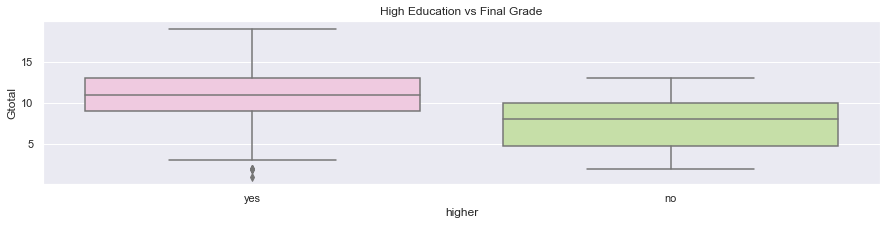

In [34]:
s=sns.boxplot(x=stdg['higher'],y=stdg['Gtotal'],palette='PiYG')
s.axes.set_title('High Education vs Final Grade')
sns.set(rc={'figure.figsize':(8,5)})

6. Going Out with Friends Attribute

Text(0.5, 1.0, 'Go Out vs Final GradeTotal')

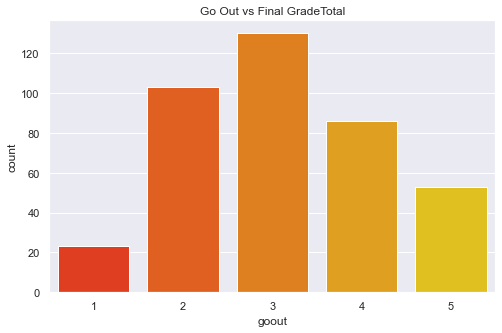

In [35]:
s = sns.countplot(x=stdg['goout'],palette='autumn')
s.axes.set_title('Go Out vs Final GradeTotal')

Text(0.5, 1.0, 'Go Out vs Final Total Grade(G3)')

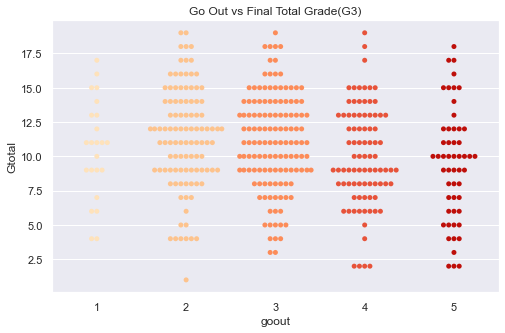

In [36]:
s = sns.swarmplot(x=stdg['goout'],y=stdg['Gtotal'],palette='OrRd')
s.axes.set_title('Go Out vs Final Total Grade(G3)')

7. Romantic relationship Attribute

Text(0.5, 1.0, 'Romantic Relationship vs Final Grade(G3)')

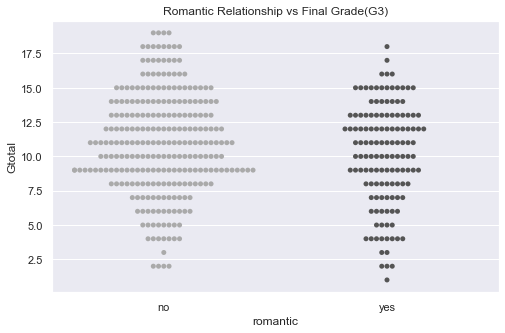

In [37]:
s = sns.swarmplot(x='romantic',y='Gtotal',data=stdg,palette='binary')
s.axes.set_title('Romantic Relationship vs Final Grade(G3)')

8. Reason Attribute

Text(0.5, 1.0, 'Reason vs Students Count')

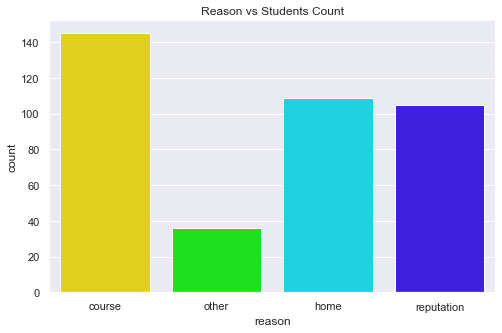

In [38]:
s = sns.countplot(x='reason',data=stdg, palette='gist_rainbow') 
s.axes.set_title('Reason vs Students Count')

Text(0.5, 1.0, 'Reason vs Final grade')

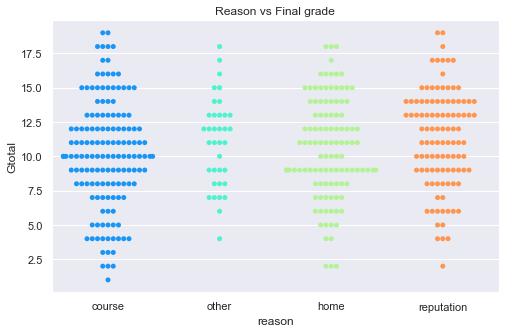

In [39]:
s = sns.swarmplot(x='reason', y='Gtotal', data=stdg,palette='rainbow')
s.axes.set_title('Reason vs Final grade')

In [40]:
stdg.corr()['Gtotal'].sort_values()

failures     -0.369085
goout        -0.155943
age          -0.131932
traveltime   -0.122247
Walc         -0.089538
health       -0.075442
Dalc         -0.071663
absences     -0.012791
freetime      0.003791
famrel        0.019434
studytime     0.132332
Fedu          0.172374
Medu          0.219673
G1            0.916471
G3            0.958266
G2            0.964517
Gtotal        1.000000
Name: Gtotal, dtype: float64

**6. Encoding categorical variables using LabelEncoder()**

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
stdg.iloc[:,0]=le.fit_transform(stdg.iloc[:,0])
stdg.iloc[:,1]=le.fit_transform(stdg.iloc[:,1])
stdg.iloc[:,3]=le.fit_transform(stdg.iloc[:,3])
stdg.iloc[:,4]=le.fit_transform(stdg.iloc[:,4])
stdg.iloc[:,5]=le.fit_transform(stdg.iloc[:,5])
stdg.iloc[:,8]=le.fit_transform(stdg.iloc[:,8])
stdg.iloc[:,9]=le.fit_transform(stdg.iloc[:,9])
stdg.iloc[:,10]=le.fit_transform(stdg.iloc[:,10])
stdg.iloc[:,11]=le.fit_transform(stdg.iloc[:,11])
stdg.iloc[:,15]=le.fit_transform(stdg.iloc[:,15])
stdg.iloc[:,16]=le.fit_transform(stdg.iloc[:,16])
stdg.iloc[:,17]=le.fit_transform(stdg.iloc[:,17])
stdg.iloc[:,18]=le.fit_transform(stdg.iloc[:,18])
stdg.iloc[:,19]=le.fit_transform(stdg.iloc[:,19])
stdg.iloc[:,20]=le.fit_transform(stdg.iloc[:,20])
stdg.iloc[:,21]=le.fit_transform(stdg.iloc[:,21])
stdg.iloc[:,22]=le.fit_transform(stdg.iloc[:,22])

In [42]:
stdg.head()

,school,Gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Gtotal
0,0,0,18,1,0,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,6
1,0,0,17,1,0,1,1,1,0,2,...,3,3,1,1,3,4,5,5,6,5
2,0,0,15,1,1,1,1,1,0,2,...,3,2,2,3,3,10,7,8,10,8
3,0,0,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,15
4,0,0,16,1,0,1,3,3,2,2,...,3,2,1,2,5,4,6,10,10,9


In [43]:
stdg.corr()['G3'].sort_values() 

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
guardian     -0.070109
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
Fjob          0.042286
famrel        0.051363
nursery       0.051568
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
Mjob          0.102082
Gender        0.103456
address       0.105756
reason        0.121994
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
Gtotal        0.958266
G3            1.000000
Name: G3, dtype: float64

In [44]:
# drop the school and grade columns
stdg = stdg.drop(['school', 'G1', 'G2'], axis='columns')

In [45]:
# Find correlations with the Grade
most_correlated = stdg.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3          1.000000
Gtotal      0.958266
failures    0.360415
Medu        0.217147
higher      0.182465
age         0.161579
Fedu        0.152457
goout       0.132791
romantic    0.129970
Name: G3, dtype: float64

In [46]:
stdg = stdg.loc[:, most_correlated.index]
stdg.head()

,G3,Gtotal,failures,Medu,higher,age,Fedu,goout,romantic
0,6,6,0,4,1,18,4,4,0
1,6,5,0,1,1,17,1,3,0
2,10,8,3,1,1,15,1,2,0
3,15,15,0,4,1,15,2,2,1
4,10,9,0,3,1,16,3,2,0


**7. Machine Learning Algorithms**

In [47]:
stdg.columns

Index(['G3', 'Gtotal', 'failures', 'Medu', 'higher', 'age', 'Fedu', 'goout',
       'romantic'],
      dtype='object')

In [48]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [49]:
# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [50]:
# Metrics`
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [51]:
# Distributions
import scipy

In [52]:
# splitting the data into training and testing data (75% and 25%)
# we mention the random state to achieve the same split everytime we run the code

X_train, X_test, y_train, y_test = train_test_split(stdg, stdg['Gtotal'], test_size = 0.25, random_state=42)

In [53]:
X_train.head()

,G3,Gtotal,failures,Medu,higher,age,Fedu,goout,romantic
16,14,14,0,4,1,16,4,3,0
66,12,13,0,4,1,15,4,3,1
211,13,12,0,4,1,17,4,5,1
7,6,6,0,4,1,17,4,4,0
19,10,9,0,4,1,16,3,3,0


In [54]:
# Calculate mae and rmse

def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [55]:
# find the median
median_pred = X_train['Gtotal'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['Gtotal']

In [56]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.3737
Median Baseline RMSE: 4.0252


In [57]:
# Evaluate several ml models by training on training set and testing on testing set

def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression','Random Forest', 'Extra Trees', 
                       'SVM','Gradient Boosted', 'Baseline']
    X_train = X_train.drop('Gtotal', axis='columns')
    X_test = X_test.drop('Gtotal', axis='columns')
    
# Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
# Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
# Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
# Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
# Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
# Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [58]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,0.888234,1.12709
ElasticNet Regression,0.954824,1.149649
Random Forest,0.657613,0.879755
Extra Trees,0.633586,0.869575
SVM,0.958079,1.435044
Gradient Boosted,0.632978,0.809526
Baseline,3.373737,4.025173


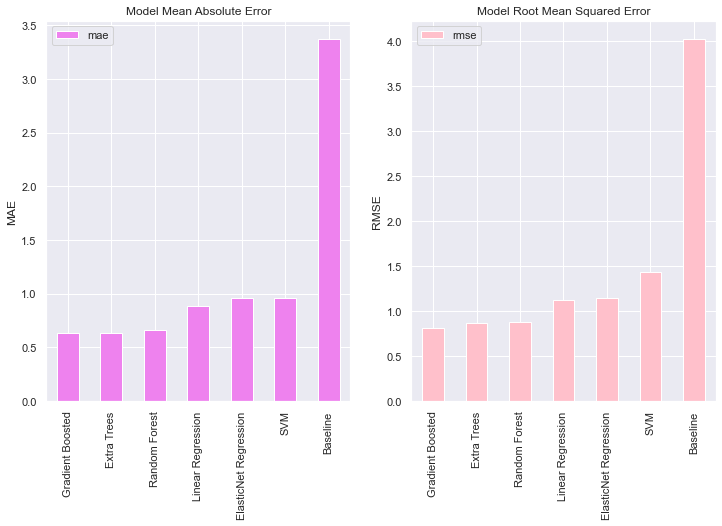

In [59]:
plt.figure(figsize=(12, 7))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'violet', ax = ax)
plt.title('Model Mean Absolute Error') 
plt.ylabel('MAE')

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'pink', ax = ax)
plt.title('Model Root Mean Squared Error') 
plt.ylabel('RMSE')

plt.show()